<a href="https://colab.research.google.com/github/jbell1991/DS-Unit-2-Applied-Modeling/blob/master/module3-permutation-boosting/Joseph_Bell_Permutation_Boosting_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.style as style
import plotly as py
from plotly.offline import init_notebook_mode, iplot
import chart_studio.tools as tls
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split

In [342]:
# loading in popularity data from robintrack.net, which lacks pricing data
# combined and cleaned in another environment due to size issues
df = pd.read_csv('/content/popularity_data.csv')
print(df.shape)
df.head()

(4428700, 3)


,users_holding,Symbol,Date
0,1524,OAS,2018-05-02
1,1517,OAS,2018-05-03
2,1522,OAS,2018-05-04
3,1520,OAS,2018-05-05
4,1520,OAS,2018-05-06


In [343]:
# loading in price data for S&P 500 stocks for the same period
# historical price data was scraped from yahoo finance
df2 = pd.read_csv('/content/combined_prices.csv')
print(df2.shape)
df2.head()

(210101, 4)


,Date,Close,Volume,Symbol
0,2018-05-02,43.860001,23601600.0,CSCO
1,2018-05-03,44.439999,23750200.0,CSCO
2,2018-05-04,45.299999,19504100.0,CSCO
3,2018-05-07,45.730000,17822400.0,CSCO
4,2018-05-08,45.709999,20285300.0,CSCO


In [344]:
# merging the popularity data with pricing data on symbol and date
users_prices = df2.merge(df, how ='inner', on = ('Symbol', 'Date'))
print(users_prices.shape)
users_prices.head()

(203927, 5)


,Date,Close,Volume,Symbol,users_holding
0,2018-05-02,43.860001,23601600.0,CSCO,23646
1,2018-05-03,44.439999,23750200.0,CSCO,23765
2,2018-05-04,45.299999,19504100.0,CSCO,23718
3,2018-05-07,45.730000,17822400.0,CSCO,23552
4,2018-05-08,45.709999,20285300.0,CSCO,23547


In [0]:
# enter ticker of your choice
ticker = 'GOOG'
# pulling data out of users_prices for specified ticker
ticker_data = users_prices[users_prices.values == ticker]
ticker_data.reset_index(inplace=True)
# splitting the data into dates
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

# dropping non numeric columns
ticker_data = ticker_data.drop(columns=['Symbol', 'Date'])
# get baselines
guess = ticker_data['Close'].mean()
errors = guess - ticker_data['Close']
baseline_mae = errors.abs().mean()
print(f'The mean closing price for {ticker} is {guess:.02f}')
print(f'The mean absolute error is {baseline_mae:.02f}')
print(f'If we just guessed the mean closing price for {ticker} was {guess:.02f}')
print(f'then we would be off by {baseline_mae:.0f} on average.')
print(ticker_data.head())
print(train.shape, val.shape, test.shape)

In [362]:
# enter ticker of your choice
ticker = 'GOOG'
# pulling data out of users_prices for specified ticker
ticker_data = users_prices[users_prices.values == ticker]
ticker_data.reset_index(inplace=True)
# dropping non numeric columns
ticker_data = ticker_data.drop(columns=['Symbol', 'Date'])
# splitting the data into train, val, and set randomly
train, test = train_test_split(ticker_data, test_size=0.2, random_state=42)
train, val = train_test_split(train, test_size=0.25, 
                                random_state=42)
# get baselines
guess = ticker_data['Close'].mean()
errors = guess - ticker_data['Close']
baseline_mae = errors.abs().mean()
print(f'The mean closing price for {ticker} is {guess:.02f}')
print(f'The mean absolute error is {baseline_mae:.02f}')
print(f'If we just guessed the mean closing price for {ticker} was {guess:.02f}')
print(f'then we would be off by {baseline_mae:.0f} on average.')
print(ticker_data.head())
print(train.shape, val.shape, test.shape)

The mean closing price for GOOG is 1164.38
The mean absolute error is 67.49
If we just guessed the mean closing price for GOOG was 1164.38
then we would be off by 67 on average.
    index        Close     Volume  users_holding
0  149406  1024.380005  1603100.0          17192
1  149407  1023.719971  1815100.0          17180
2  149408  1048.209961  1938700.0          17287
3  149409  1054.790039  1466100.0          16985
4  149410  1053.910034  1217700.0          16852
(249, 4) (83, 4) (83, 4)


In [0]:
# arrange data into X features and y target vector 
target = 'Close'
X_train = train.drop(columns=[target])
y_train = train[target]
X_val = val.drop(columns=[target])
y_val = val[target]
X_test = test.drop(columns=[target])
y_test = test[target]

In [364]:
X_train.shape, X_val.shape, X_test.shape

((249, 3), (83, 3), (83, 3))

In [365]:
y_train.shape, y_val.shape, y_test.shape

((249,), (83,), (83,))

In [370]:
# making a pipeline
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import xgboost as xgb

pipeline = make_pipeline(
    xgb.XGBRegressor()
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

y_pred = pipeline.predict(X_val)

[00:13:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation Accuracy 0.9318356329146683


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning:

Series.base is deprecated and will be removed in a future version



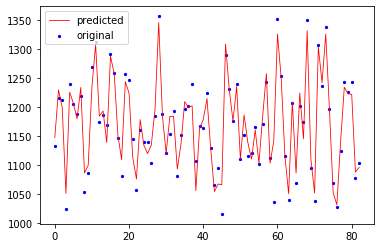

In [371]:
x_ax = range(len(y_val))
plt.scatter(x_ax, y_val, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [283]:
"# fitting data to a multiple linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [267]:
# calculating error on training data
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Train error: {mae:.2f} dollars')

Train error: 11.65 dollars


In [268]:
# calculating error on validation data
y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print(f'Train error: {mae:.2f} dollars')

Train error: 11.75 dollars


In [269]:
# calculating error on testing data
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test error: {mae:.2f} dollars')

Test error: 13.84 dollars


In [270]:
model.coef_

array([-1.64762883e-01, -3.80455703e-06, -5.18379466e-03])

In [271]:
model.intercept_

15146.00366815801

In [272]:
# print regression metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R^2:', r2)

Mean Squared Error: 353.59527961633347
Root Mean Squared Error: 18.804129323537783
R^2: 0.787829770299344


In [273]:
# plotting two features
import plotly.express as px
px.scatter_3d(
    train,
    x = 'users_holding',
    y = 'Volume',
    z = 'Close',
    title = ticker
)

In [20]:
# pivoting the dataset to make it more readable, and easier to manipulate
# we can now see some of the missing values(NaNs)
users_prices_pivot = pd.pivot_table(users_prices, index=['Date'], columns=['Symbol'])
users_prices_pivot

Close                         ... users_holding               
Symbol              A        AAL         AAP  ...          ZBRA   ZION     ZTS
Date                                          ...                             
2018-05-02  65.910004  42.240002  115.900002  ...         195.0  246.0   588.0
2018-05-03  66.339996  42.110001  115.430000  ...         200.0  243.0   611.0
2018-05-04  67.000000  42.860001  116.669998  ...         201.0  244.0   609.0
2018-05-07  67.389999  42.439999  116.139999  ...         204.0  238.0   607.0
2018-05-08  67.370003  43.000000  116.800003  ...         225.0  237.0   604.0
...               ...        ...         ...  ...           ...    ...     ...
2019-12-24  85.300003  29.180000  160.570007  ...         778.0  243.0  1595.0
2019-12-26  85.449997  29.670000  159.270004  ...         776.0  245.0  1596.0
2019-12-27  85.419998  28.440001  158.350006  ...         780.0  246.0  1599.0
2019-12-30  84.900002  28.299999  159.119995  ...         784.0  246.0  1599.0
2019-12-31  85.309998  28.680000  160.160004  ...         782.0  245.0  1598.0

[415 rows x 1509 columns]

In [21]:
# dropping NaNs from the dataset
users_prices_pivot = users_prices_pivot.dropna(axis=1)
# dropping the volume column
users_prices_pivot = users_prices_pivot.drop(columns=['Volume'])
# replacing any zero values with a nonzero value to avoid any undefined errors
users_prices_pivot = users_prices_pivot.replace(0, value=.000001)
users_prices_pivot

Close                         ... users_holding               
Symbol              A        AAL         AAP  ...          ZBRA   ZION     ZTS
Date                                          ...                             
2018-05-02  65.910004  42.240002  115.900002  ...         195.0  246.0   588.0
2018-05-03  66.339996  42.110001  115.430000  ...         200.0  243.0   611.0
2018-05-04  67.000000  42.860001  116.669998  ...         201.0  244.0   609.0
2018-05-07  67.389999  42.439999  116.139999  ...         204.0  238.0   607.0
2018-05-08  67.370003  43.000000  116.800003  ...         225.0  237.0   604.0
...               ...        ...         ...  ...           ...    ...     ...
2019-12-24  85.300003  29.180000  160.570007  ...         778.0  243.0  1595.0
2019-12-26  85.449997  29.670000  159.270004  ...         776.0  245.0  1596.0
2019-12-27  85.419998  28.440001  158.350006  ...         780.0  246.0  1599.0
2019-12-30  84.900002  28.299999  159.119995  ...         784.0  246.0  1599.0
2019-12-31  85.309998  28.680000  160.160004  ...         782.0  245.0  1598.0

[415 rows x 962 columns]

In [0]:
# taking the first and last rows of the dataframe to calculate percentage change
first = users_prices_pivot.iloc[0]
last = users_prices_pivot.iloc[414]

In [23]:
# creating a new dataframe containing percentage change calculations
first_last = pd.DataFrame(((last / first) - 1) * 100)
first_last = first_last.T
first_last.stack().T

0              ...                      
Symbol                 A         AAL  ...      ZION         ZTS
Close          29.434066  -32.102275  ... -5.924987   65.644560
users_holding  96.610169  186.577896  ... -0.406504  171.768707

[2 rows x 481 columns]

In [0]:
# saved dataframe to a csv and deleted first row 0 using excel 
first_last.stack().T.to_csv('first_last.csv')

In [25]:
# reloaded the dataframe from excel
first_last_index = pd.read_csv('/content/first_last_index.csv', index_col=0)
first_last_index

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADS,ADSK,AEE,AEP,AES,AFL,AGN,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,ALXN,AMAT,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,ANTM,...,UTX,V,VAR,VFC,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAB,WAT,WBA,WCG,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WRK,WU,WY,WYNN,XEC,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Close,29.434066,-32.102275,38.188095,66.307969,-11.786392,-7.767416,-43.539423,50.146937,39.718664,49.167792,34.586628,4.321400,39.685403,-43.688835,46.463359,31.551904,36.594882,63.248567,17.425089,26.543979,-6.400435,46.229365,38.738351,20.558263,-25.347502,11.853132,6.878058,19.551350,65.788068,-5.330879,20.799530,318.049220,42.181034,42.282959,25.257534,68.403316,17.720803,-23.378287,60.270221,31.787245,...,26.379742,48.678587,22.169647,32.846653,-16.570155,26.684850,-4.054246,49.339996,63.218965,46.484241,10.253968,28.586391,-11.197349,23.500180,-7.368425,56.171958,-17.324471,43.258787,48.555858,3.084883,-4.350367,37.758379,40.969822,-9.292544,37.641883,40.200186,-26.724729,39.116887,-17.350848,-27.304614,-46.716069,36.420285,-9.140630,11.860051,14.387346,25.598513,27.430609,91.887028,-5.924987,65.644560
users_holding,96.610169,186.577896,-11.258278,42.541367,77.943939,-10.108303,339.583333,93.500838,50.933333,46.247034,6.372549,169.842932,55.586987,232.812500,83.421751,51.891892,89.683860,60.247486,66.512488,-11.596180,30.708661,54.545455,84.705882,5.898491,39.111709,17.900684,16.273850,-12.820513,71.153846,40.950792,-25.073407,31.495492,43.292683,13.484303,84.827586,85.432473,58.547958,23.430322,161.437908,160.497238,...,120.781250,135.390500,16.666667,76.806084,86.139283,89.605735,68.027211,97.500000,70.000000,50.842021,55.781818,89.075243,448.936170,-26.666667,217.914692,96.202532,37.474482,40.926641,62.491888,32.086168,76.380368,133.333333,177.127578,172.569444,21.667080,92.452830,369.421488,37.645108,267.671692,23.023170,243.362832,156.480000,72.728138,68.306011,49.319213,73.555909,26.060606,301.025641,-0.406504,171.768708


In [26]:
# exploring the dataset to see names of columns 
first_last_index_t = first_last_index.T
first_last_index_t = first_last_index_t.reset_index()
first_last_index_t

Symbol,index,Close,users_holding
0,A,29.434066,96.610169
1,AAL,-32.102275,186.577896
2,AAP,38.188095,-11.258278
3,AAPL,66.307969,42.541367
4,ABBV,-11.786392,77.943939
...,...,...,...
476,YUM,25.598513,73.555909
477,ZBH,27.430609,26.060606
478,ZBRA,91.887028,301.025641
479,ZION,-5.924987,-0.406504


In [177]:
guess = first_last_index_t['Close'].mean()
errors = guess - first_last_index_t['Close']
baseline_mae = errors.abs().mean()

print(f'If we just guessed the mean percentage change in price was {guess:.02f}')
print(f'then we would be off by {baseline_mae:.0f} on average.')

If we just guessed the mean percentage change in price was 19.17
then we would be off by 24 on average.
